## Creating Custom Datasets

In [17]:
import requests
import zipfile
from pathlib import Path

#Setup path to data folder
data_path=Path("data")
image_path=data_path/"pizza_steak_sushi"

#Check if image path exists, if not, create

if image_path.is_dir():
    print(f"{image_path} exists")

else:
    print(f"{image_path} does not exist, so creating a folder and downloading it....")
    image_path.mkdir(parents=True, exist_ok=True)

    #download
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)
  
    

SyntaxError: invalid non-printable character U+00A0 (186538501.py, line 28)

In [19]:
#Setup path to data folder
data_path=Path("data")
image_path=data_path/"pizza_steak_sushi"

#Check if image path exists, if not, create

if image_path.is_dir():
    print(f"{image_path} exists")
else:
    print(f"{image_path} does not exist, so creating a folder and downloading it....")
    image_path.mkdir(parents=True, exist_ok=True)

data/pizza_steak_sushi does not exist, so creating a folder and downloading it....


In [21]:
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

In [23]:
# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...") 
    zip_ref.extractall(image_path)

Unzipping pizza, steak, sushi data...


In [31]:
import os
x=os.walk(image_path)

In [37]:
dir(x)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_suspended',
 'gi_yieldfrom',
 'send',
 'throw']

In [39]:
help(x)

Help on generator object:

walk = class generator(object)
 |  Methods defined here:
 |
 |  __del__(...)
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __iter__(self, /)
 |      Implement iter(self).
 |
 |  __next__(self, /)
 |      Implement next(self).
 |
 |  __repr__(self, /)
 |      Return repr(self).
 |
 |  __sizeof__(...)
 |      gen.__sizeof__() -> size of gen in memory, in bytes
 |
 |  close(...)
 |      close() -> raise GeneratorExit inside generator.
 |
 |  send(...)
 |      send(arg) -> send 'arg' into generator,
 |      return next yielded value or raise StopIteration.
 |
 |  throw(...)
 |      throw(value)
 |      throw(type[,value[,tb]])
 |
 |      Raise exception in generator, return next yielded value or raise
 |      StopIteration.
 |      the (type, val, tb) signature is deprecated,
 |      and may be removed in a future version of Python.
 |
 |  ----------------------------------------------------------------------
 |  Data descripto

In [41]:
next(x) ---# use it to understand what an object returns

('data/pizza_steak_sushi', ['test', 'train'], [])

In [43]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [45]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


Random image path: data/pizza_steak_sushi/train/pizza/320570.jpg
Image class: pizza
Image height: 512
Image width: 382


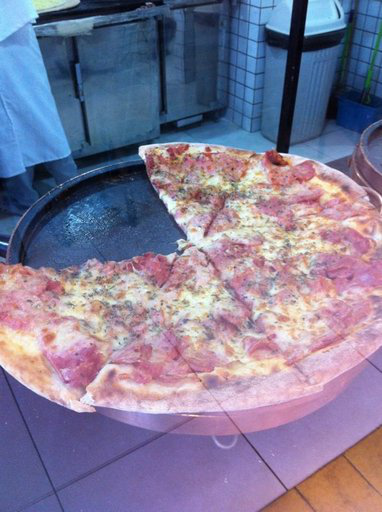

In [77]:
import random
from PIL import Image

image_path_list=list(image_path.glob("*/*/*.jpg"))
random_image=random.choice(image_path_list)
image_class= random_image.parent.stem
img=Image.open(random_image)

print(f"Random image path: {random_image}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img


In [51]:
image_path

PosixPath('data/pizza_steak_sushi')

## Preparing data

In [82]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [86]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths=random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax=plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image)
            ax[0].set_title(f"tranformed Image \nSize: {transformed_image.size}")
            ax[0].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

        


        